In [70]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
FOLDER = '/home/tony/work/solo/octaveplay/andrew_exercises/machine-learning-ex1'

In [71]:
datafile = FOLDER+'/ex1/ex1data1.txt'
data = np.loadtxt(datafile, delimiter=',')
X = data[:, 0:1]
y = data[:, 1:2]
m = y.size
print('loaded %s training samples' % m)

loaded 97 training samples


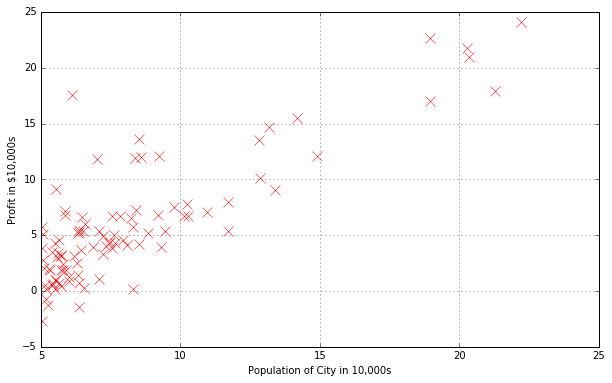

In [65]:
figure(figsize=(10, 6))
plot(X, y, 'rx', markersize=10)  # Mas olha, quem copiou quem??
grid(True)
ylabel('Profit in $10,000s')
xlabel('Population of City in 10,000s')

In [72]:
def compute_cost(X, y, th):
    diffs = X.dot(th) - y
    return (1.0 / (2 * m)) * sum(np.multiply(diffs, diffs))[0]

X = np.hstack((np.ones((m, 1)), data[:, 0:1]))
theta = np.zeros((2, 1))

print 'The cost for theta=[0,0] is %s' % compute_cost(X, y, theta)

The cost for theta=[0,0] is 32.0727338775


Gradient descent got us this optimum theta: 
[[-3.63029144]
 [ 1.16636235]]
See how J(theta) decreased with num_iters below


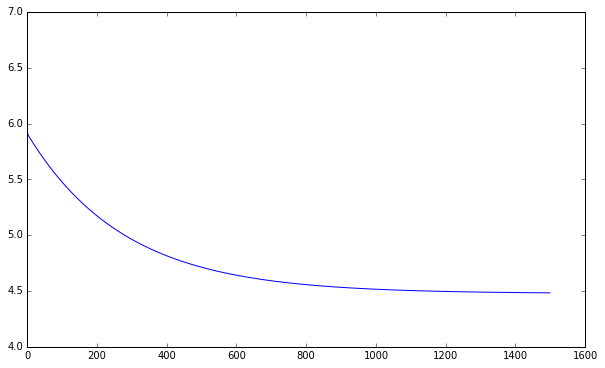

In [84]:
def gradient_descent(X, y, th, alpha, num_iters):
    m = y.size
    J_hist = np.zeros((num_iters, 1))
    for i in range(num_iters):
        diffs = X.dot(th) - y
        delta = (1.0 / m) * (X.transpose().dot(diffs))
        th -= alpha * delta
        J_hist[i, 0] = compute_cost(X, y, th)
    return th, J_hist

theta = np.zeros((2, 1))
alpha = 0.01
num_iterations = 1500
theta_opt, J_history = gradient_descent(X, y, theta, alpha, num_iterations)
print 'Gradient descent got us this optimum theta: \n%s' % theta_opt
print 'See how J(theta) decreased with num_iters below'

figure(figsize=(10, 6))
plot(J_history)



And below you can see how well our hipothesis fit the data


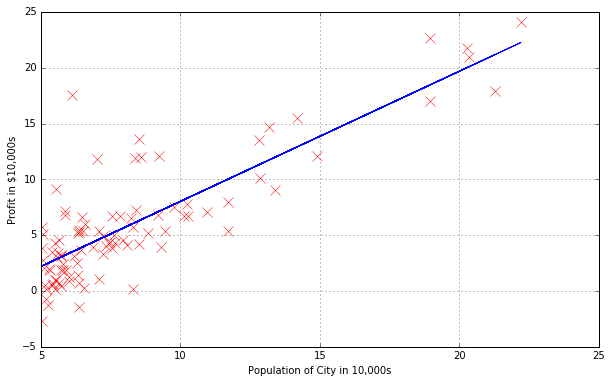

In [83]:
print 'And below you can see how well our hipothesis fit the data'

figure(figsize=(10, 6))
plot(X[:, 1:2], y, 'rx', markersize=10)  # Mas olha, quem copiou quem??
grid(True)
ylabel('Profit in $10,000s')
xlabel('Population of City in 10,000s')
plot(X[:, 1:2], X.dot(theta_opt))